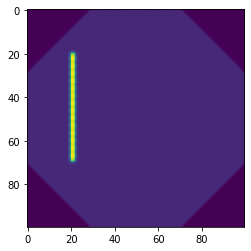

In [31]:
import torch
import kornia as K
from matplotlib import pyplot as plt
import numpy as np

x,y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
x = np.ones((100,100))
x[20:70, 20:22] = 10
x = torch.from_numpy(x).float().unsqueeze(0).unsqueeze(1)
x = K.geometry.transform.rotate(x.float(), torch.tensor([135]).float(), align_corners=True)
x = K.geometry.transform.rotate(x.float(), torch.tensor([-135]).float(), align_corners=True)
plt.imshow(x[0, 0].numpy())

In [11]:
from torchvision.models import efficientnet_v2_m, efficientnet_b5
from torchvision.models.feature_extraction import create_feature_extractor, get_graph_node_names
from torchsummary import summary

m1 = efficientnet_v2_m(pretrained=False)
m2 = efficientnet_b5(pretrained=False)

summary(m2, (3, 768, 768))

/home/brani/miniconda3/envs/monster/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/brani/miniconda3/envs/monster/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Layer (type:depth-idx)                        Output Shape              Param #
├─Sequential: 1-1                             [-1, 2048, 24, 24]        --
|    └─Conv2dNormActivation: 2-1              [-1, 48, 384, 384]        --
|    |    └─Conv2d: 3-1                       [-1, 48, 384, 384]        1,296
|    |    └─BatchNorm2d: 3-2                  [-1, 48, 384, 384]        96
|    |    └─SiLU: 3-3                         [-1, 48, 384, 384]        --
|    └─Sequential: 2-2                        [-1, 24, 384, 384]        --
|    |    └─MBConv: 3-4                       [-1, 24, 384, 384]        2,940
|    |    └─MBConv: 3-5                       [-1, 24, 384, 384]        1,206
|    |    └─MBConv: 3-6                       [-1, 24, 384, 384]        1,206
|    └─Sequential: 2-3                        [-1, 40, 192, 192]        --
|    |    └─MBConv: 3-7                       [-1, 40, 192, 192]        13,046
|    |    └─MBConv: 3-8                       [-1, 40, 192, 192]        27,450


Layer (type:depth-idx)                        Output Shape              Param #
├─Sequential: 1-1                             [-1, 2048, 24, 24]        --
|    └─Conv2dNormActivation: 2-1              [-1, 48, 384, 384]        --
|    |    └─Conv2d: 3-1                       [-1, 48, 384, 384]        1,296
|    |    └─BatchNorm2d: 3-2                  [-1, 48, 384, 384]        96
|    |    └─SiLU: 3-3                         [-1, 48, 384, 384]        --
|    └─Sequential: 2-2                        [-1, 24, 384, 384]        --
|    |    └─MBConv: 3-4                       [-1, 24, 384, 384]        2,940
|    |    └─MBConv: 3-5                       [-1, 24, 384, 384]        1,206
|    |    └─MBConv: 3-6                       [-1, 24, 384, 384]        1,206
|    └─Sequential: 2-3                        [-1, 40, 192, 192]        --
|    |    └─MBConv: 3-7                       [-1, 40, 192, 192]        13,046
|    |    └─MBConv: 3-8                       [-1, 40, 192, 192]        27,450


In [2]:
get_graph_node_names(m1)

(['x',
  'features.0',
  'features.1.0.block.0',
  'features.1.0.stochastic_depth',
  'features.1.0.add',
  'features.1.1.block.0',
  'features.1.1.stochastic_depth',
  'features.1.1.add',
  'features.1.2.block.0',
  'features.1.2.stochastic_depth',
  'features.1.2.add',
  'features.2.0.block.0',
  'features.2.0.block.1',
  'features.2.1.block.0',
  'features.2.1.block.1',
  'features.2.1.stochastic_depth',
  'features.2.1.add',
  'features.2.2.block.0',
  'features.2.2.block.1',
  'features.2.2.stochastic_depth',
  'features.2.2.add',
  'features.2.3.block.0',
  'features.2.3.block.1',
  'features.2.3.stochastic_depth',
  'features.2.3.add',
  'features.2.4.block.0',
  'features.2.4.block.1',
  'features.2.4.stochastic_depth',
  'features.2.4.add',
  'features.3.0.block.0',
  'features.3.0.block.1',
  'features.3.1.block.0',
  'features.3.1.block.1',
  'features.3.1.stochastic_depth',
  'features.3.1.add',
  'features.3.2.block.0',
  'features.3.2.block.1',
  'features.3.2.stochastic_

In [10]:
import torch
model = create_feature_extractor(
    m1, {
        'features.1.2.add': 'layer0', 
        'features.2.4.add': 'layer1', 
        'features.3.4.add': 'layer2', 
        'features.5.13.add': 'layer3', 
        'features.8': 'layer4'
        })
out = model(torch.rand(1, 3, 224, 224).cuda())

for k, v in out.items():
    print(k, v.shape)

layer0 torch.Size([1, 24, 112, 112])
layer1 torch.Size([1, 48, 56, 56])
layer2 torch.Size([1, 160, 14, 14])
layer3 torch.Size([1, 176, 14, 14])
layer4 torch.Size([1, 1280, 7, 7])
